In [1]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
# from google.colab import files

## 1. Import Data

In [2]:
# Fungsi ini digunakan untuk memuat semua gambar dari direktori tertentu, 
# mengubah ukurannya menjadi 224x224 piksel, mengonversinya ke format RGB,
# dan mengembalikannya sebagai array NumPy dalam list.

def load_images(directory):
    # Membuat list kosong untuk menyimpan gambar yang telah dimuat.
    images = []
    
    # Melakukan iterasi untuk setiap nama file di dalam direktori yang diberikan.
    for filename in os.listdir(directory):
        # Membuka gambar dari path lengkap (menggabungkan direktori dan nama file).
        img = Image.open(os.path.join(directory, filename))
        
        # Mengubah ukuran gambar menjadi (224, 224) piksel.
        img = img.resize((224, 224))
        
        # Mengonversi gambar ke format RGB agar memiliki 3 channel warna.
        img = img.convert('RGB')
        
        # Mengubah gambar menjadi array NumPy untuk proses selanjutnya.
        img = np.array(img)
        
        # Menambahkan gambar yang telah diproses ke dalam list `images`.
        images.append(img)
    
    # Mengembalikan list gambar yang telah dimuat.
    return images


In [3]:
tumor_images = load_images(r'D:\Code\JupyterNotebook\Deep Learning\PrediksiTumorOtak\brain_tumor_dataset\yes')
no_tumor_images = load_images(r'D:\Code\JupyterNotebook\Deep Learning\PrediksiTumorOtak\brain_tumor_dataset\no')

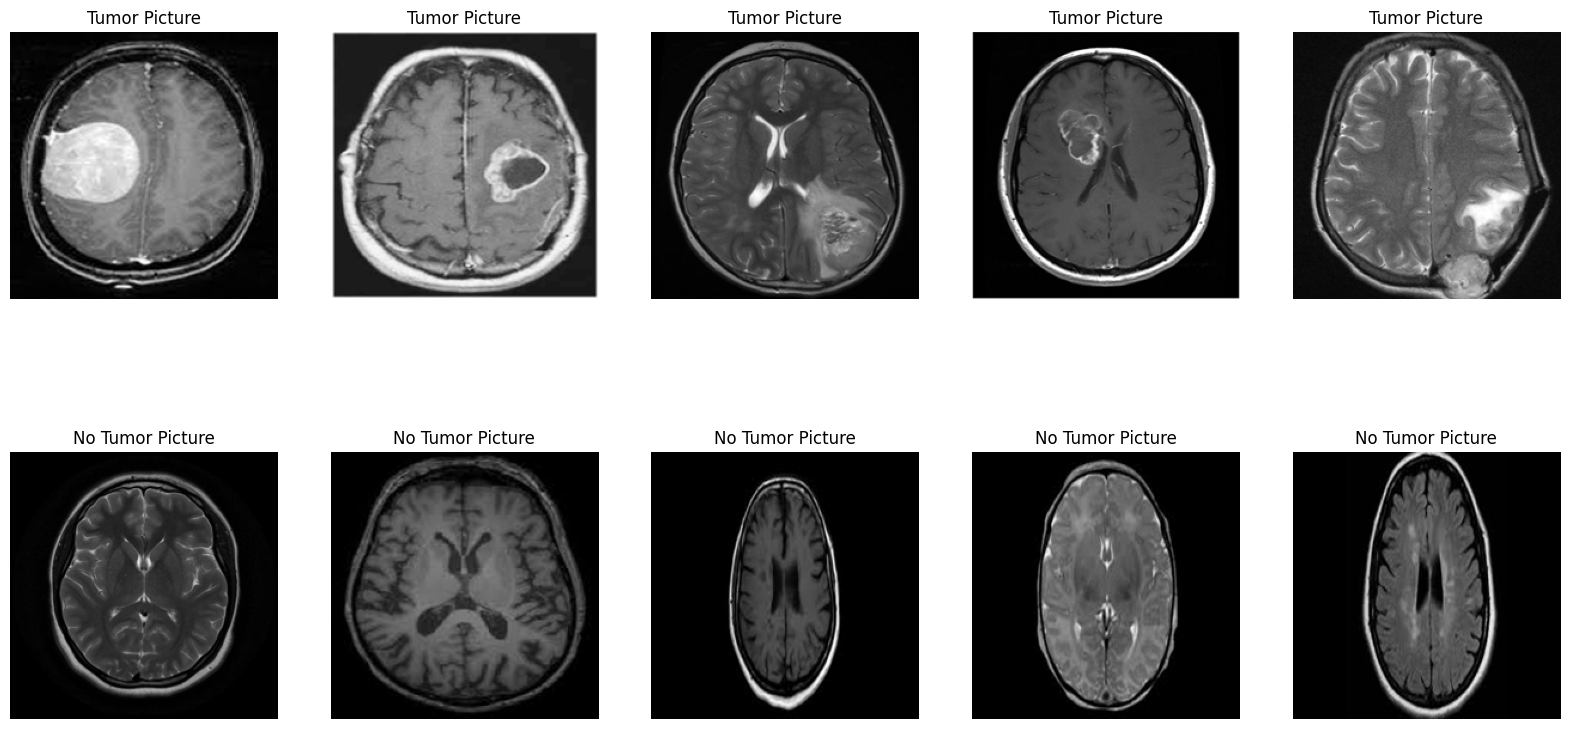

In [4]:
# menampilkan data
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# melakukan perulangan 5x untuk gambar tumor dan no tumor
for i in range(5):
  axes[0, i].imshow(tumor_images[i])
  axes[0, i].set_title('Tumor Picture')
  axes[0, i].axis('off')

for i in range(5):
  axes[1, i].imshow(no_tumor_images[i])
  axes[1, i].set_title('No Tumor Picture')
  axes[1, i].axis('off')

plt.show()

In [5]:
# melihat tipedata dari tumor_images dan no_tumor_images
print("tumor_images:", type(tumor_images))
print("tumor_images:", type(no_tumor_images))

tumor_images: <class 'list'>
tumor_images: <class 'list'>


In [6]:
# meliha berapa baris data dari tumor_images dan no_tumor_images
print("tumor__images:", len(tumor_images))
print("no_tumor__images:",len(no_tumor_images))

tumor__images: 155
no_tumor__images: 98


## 2. Labeling

In [7]:
# Fungsi ini digunakan untuk mengassign label ke gambar tumor dan gambar tanpa tumor.

# Label untuk gambar tumor adalah 1, sedangkan label untuk gambar tanpa tumor adalah 0.
def assign_label(tumor_images, no_tumor_images):
    # Membuat array label dengan nilai 1 (menunjukkan tumor) sebanyak jumlah gambar tumor.
    tumor_labels = np.ones(len(tumor_images))
    
    # Membuat array label dengan nilai 0 (menunjukkan tanpa tumor) sebanyak jumlah gambar tanpa tumor.
    no_tumor_labels = np.zeros(len(no_tumor_images))
    
    # Mengembalikan dua array label sebagai output.
    return tumor_labels, no_tumor_labels

# Memanggil fungsi `assign_label` untuk membuat label bagi gambar tumor dan gambar tanpa tumor.
# Hasilnya disimpan dalam variabel `tumor_label` dan `no_tumor_label`.
tumor_labels, no_tumor_labels = assign_label(tumor_images, no_tumor_images)


In [8]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [9]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
type(tumor_labels)

numpy.ndarray

In [11]:
# Menggabungkan daftar gambar tumor dan gambar tanpa tumor menjadi satu list data.
data = tumor_images + no_tumor_images

# Menggabungkan array label untuk gambar tumor dan gambar tanpa tumor menjadi satu array label.
# `np.concatenate()` digunakan untuk menggabungkan dua array di sepanjang sumbu 0 (axis=0).
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [12]:
# menampilkan data
data

[array([[[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        ...,
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [2, 2, 2],
         [3, 3, 3],
         [3, 3, 3]],
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [2, 2, 2]],
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [2, 2, 2]]], dtype=uint8),
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [251, 251, 251],
      

In [13]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
data[0].shape

# dimensinya 224x224x3 (3 adalah RGB)

(224, 224, 3)

## 3. Spliting Data

In [15]:
# inisialisasi variabel X 
X = np.array(data)
# inisialisasi variabel y
y = np.array(labels)

In [16]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji.
# Data input (x) dan target (y) dipisahkan berdasarkan proporsi test_size=0.2.
# 80% data digunakan untuk pelatihan, dan 20% untuk pengujian.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# membuat dataset dari tensorflow
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# tujuannya untuk memudahkan kita dalam praprosesing data dan feature ekstraksi di bagian training dan testing

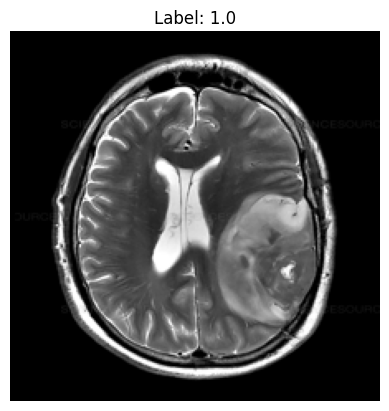

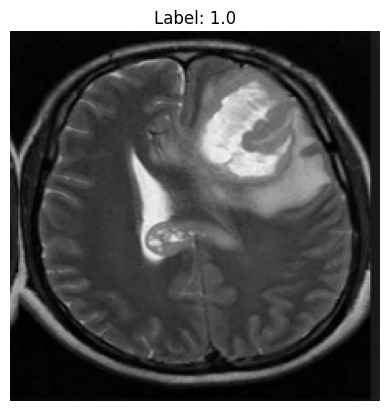

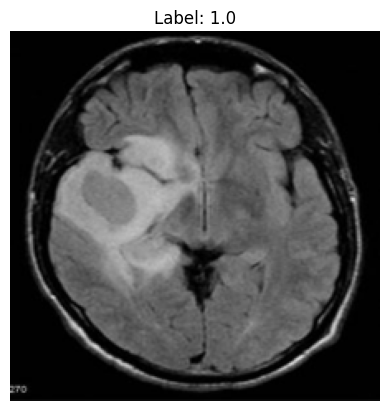

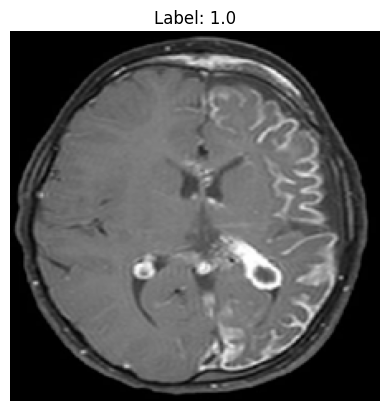

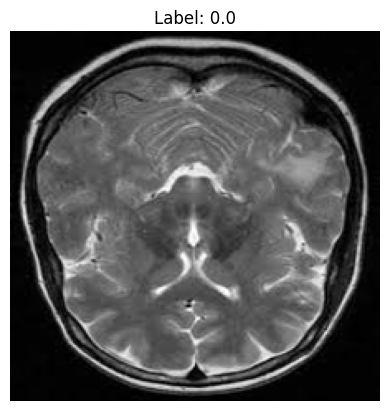

In [18]:
# tampilkan 5 data gambar yang sudah diproses menggunakan tensorflow
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

1.0 berarti tumor dan 0.0 berarti no tumor

In [19]:
# membuat variabel validation dan train 

# Menentukan ukuran set validasi sebagai 10% dari total jumlah data (dalam hal ini, 200).
validation_size = int(0.1 * 200)

# Menghapus (skip) jumlah data yang sesuai dengan `validation_size` dari awal set data `train`.
# Ini membuat data `train` berisi sisa data untuk pelatihan.
# 11% - 100% akan digunakan untuk variabel train
train = train.skip(validation_size)

# Mengambil (take) jumlah data yang sesuai dengan `validation_size` dari set data `train`.
# Ini membuat data `val` berisi data untuk validasi.
# 0% - 10% akan digunakan untuk variabel val
val = train.take(validation_size)


In [20]:
# Menentukan ukuran batch untuk data pelatihan, validasi, dan pengujian.
BATCH_SIZE = 32

# Metode `batch()` digunakan untuk membagi data menjadi kelompok-kelompok kecil agar bisa diproses oleh model dalam setiap iterasi.
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)


## 4. Training Data

In [21]:
# Membuat model sequential menggunakan API Keras.
model = Sequential()

# Menambahkan layer konvolusi 2D dengan 32 filter, ukuran kernel (3, 3),
# fungsi aktivasi ReLU, dan input shape (224, 224, 3). Padding 'valid' berarti tidak ada padding tambahan.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='valid'))

# Menambahkan layer max pooling dengan ukuran pool (2, 2) untuk mereduksi dimensi fitur.
model.add(MaxPooling2D((2, 2)))

# Menambahkan layer flatten untuk mengubah data dari bentuk 2D menjadi 1D sebelum dimasukkan ke layer dense.
model.add(Flatten())

# Menambahkan layer dense (fully connected) dengan 256 neuron dan fungsi aktivasi ReLU.
model.add(Dense(256, activation='relu'))

# Menambahkan layer dropout dengan rate 0.5 untuk mengurangi overfitting dengan mengabaikan 50% unit selama pelatihan.
model.add(Dropout(0.5))

# Menambahkan layer dense (fully connected) terakhir dengan 1 neuron dan fungsi aktivasi sigmoid.
# Ini digunakan untuk output binary classification (0 atau 1).
model.add(Dense(1, activation='sigmoid'))


C:\Users\LEGION SLIM 7\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │   100,933,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Mengkompilasi model dengan optimizer, fungsi loss, dan metrik evaluasi.
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [24]:
# Melatih model dengan data train dan validasi selama 10 epoch.
# Parameter `verbose=1` akan menampilkan kemajuan pelatihan pada setiap epoch.
history = model.fit(train, validation_data=val, epochs=10, verbose=1)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 822ms/step - accuracy: 0.5646 - loss: 2459.0320 - val_accuracy: 0.8500 - val_loss: 514.3091
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 819ms/step - accuracy: 0.7933 - loss: 780.7412 - val_accuracy: 0.8500 - val_loss: 229.7139
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 798ms/step - accuracy: 0.7882 - loss: 467.0163 - val_accuracy: 0.9500 - val_loss: 33.5910
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 796ms/step - accuracy: 0.8477 - loss: 192.1844 - val_accuracy: 0.9500 - val_loss: 2.7458
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 787ms/step - accuracy: 0.8433 - loss: 75.0296 - val_accuracy: 1.0000 - val_loss: 5.8028e-07
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 787ms/step - accuracy: 0.8932 - loss: 27.1033 - val_accuracy: 0.9500 - val_loss: 10.6648
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 795ms/step - accuracy: 0.9504 - loss: 16.5007 - val_accuracy: 1.0000 - val_loss: 8.5822e-36
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 790ms/step - accuracy: 0.9620 - loss: 4.3528 - val_ac

In [25]:
# Mengevaluasi performa model pada data pengujian.
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7363 - loss: 104.7787


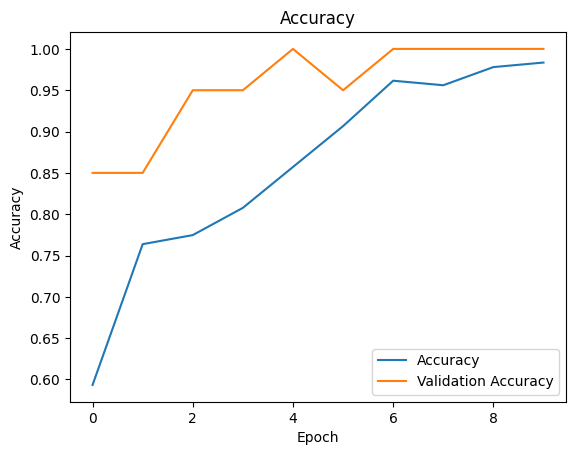

In [26]:
# Membuat plot untuk visualisasi akurasi selama pelatihan.
plt.plot(history.history['accuracy'])  # Plot akurasi untuk data pelatihan.
plt.plot(history.history['val_accuracy'])  # Plot akurasi untuk data validasi.
plt.legend(['Accuracy', 'Validation Accuracy'], loc='lower right')  # Menambahkan legenda untuk membedakan antara akurasi pelatihan dan validasi.
plt.title('Accuracy')  # Menambahkan judul untuk plot.
plt.xlabel('Epoch')  # Menambahkan label pada sumbu x.
plt.ylabel('Accuracy')  # Menambahkan label pada sumbu y.
plt.show()  # Menampilkan plot.


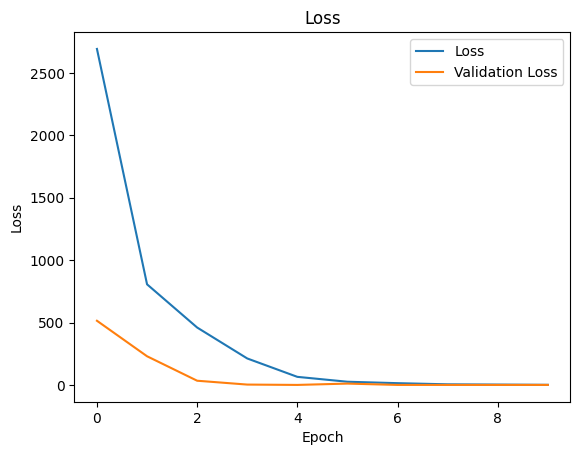

In [27]:
# Membuat plot untuk visualisasi loss selama pelatihan.
plt.plot(history.history['loss'])  # Plot loss untuk data pelatihan.
plt.plot(history.history['val_loss'])  # Plot loss untuk data validasi.
plt.legend(['Loss', 'Validation Loss'], loc='upper right')  # Menambahkan legenda untuk membedakan antara loss pelatihan dan validasi.
plt.title('Loss')  # Menambahkan judul untuk plot.
plt.xlabel('Epoch')  # Menambahkan label pada sumbu x.
plt.ylabel('Loss')  # Menambahkan label pada sumbu y.
plt.show()  # Menampilkan plot.

In [28]:
# Hasil dari training data perlu disimpan ke komputer lokal karena agar kita tidak perlu melakukan perulangan untuk training epoche selanjutnya, ketika kedepannya ingin melakukan proses testing
#model.save(r'D:\Code\JupyterNotebook\Deep Learning\PrediksiTumorOtak\tumor_otak.h5')

## 5. Testing

In [ ]:
# Fungsi untuk memuat gambar yang diunggah, mengubah ukuran, dan mengonversinya menjadi array numpy.
def load_uploaded_image(image_bytes):
    # Membuka gambar dari bytes menggunakan PIL dan mengubah ukuran menjadi 224x224.
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    # Mengonversi gambar ke array numpy dan menormalkan nilai piksel ke rentang 0-1.
    img_array = np.array(img) / 255.0
    return img_array

# Fungsi untuk memprediksi apakah gambar mengandung tumor atau tidak.
def predict_image(image_bytes):
    # Memuat gambar yang diunggah dan mengubahnya menjadi array.
    img_array = load_uploaded_image(image_bytes)
    # Menambahkan dimensi batch untuk input ke model.
    img_array = np.expand_dims(img_array, axis=0)
    # Menggunakan model untuk memprediksi gambar.
    prediction = model.predict(img_array)
    # Mengembalikan hasil prediksi berdasarkan ambang batas 0.5.
    if prediction[0][0] > 0.5:
        return "Tumor detected"
    else:
        return "No tumor detected"

In [ ]:
# ini upload gambar menggunakan colab

# # Mengunggah file gambar dari pengguna.
# uploaded = files.upload()  # Menggunakan fungsi `files.upload()` untuk mengunggah gambar ke Colab.

# # Menyimpan nama file gambar yang diunggah.
# file_name = list(uploaded.keys())[0]  # Mengambil nama file dari dictionary `uploaded`.

# # Menyimpan data gambar dalam bentuk bytes.
# image_bytes = uploaded[file_name]  # Mengambil data gambar dari dictionary `uploaded`.

# # Membuka gambar menggunakan PIL dan menampilkan gambar tersebut.
# img = Image.open(io.BytesIO(image_bytes))  # Membuka gambar dari data bytes menggunakan PIL.

# # Menampilkan gambar dengan matplotlib.
# plt.imshow(img)  # Menampilkan gambar.
# plt.axis('off')  # Menghapus sumbu untuk tampilan yang lebih bersih.
# plt.show()  # Menampilkan gambar.

# # Memanggil fungsi `predict_image` untuk memprediksi gambar yang diunggah.
# result = predict_image(image_bytes)

# # Menampilkan hasil prediksi.
# print(result)


FileUpload(value=(), accept='image/*', description='Upload')

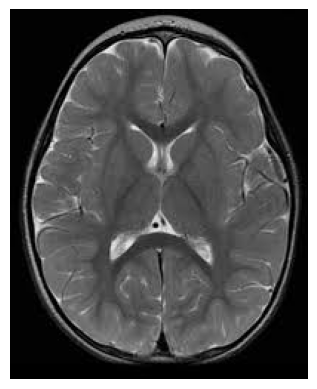

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
No tumor detected


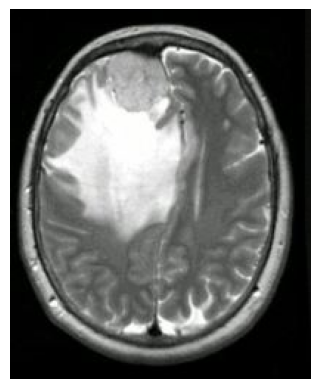

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Tumor detected


In [34]:
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import io

# Widget untuk memilih file
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_widget)

# Fungsi untuk menampilkan gambar setelah diunggah
def on_upload_change(change):
    uploaded_file = upload_widget.value[0]  # Mengambil file pertama (jika ada)
    image_bytes = uploaded_file['content']
    img = Image.open(io.BytesIO(image_bytes))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Memanggil fungsi `predict_image` jika diperlukan
    result = predict_image(image_bytes)
    print(result)

upload_widget.observe(on_upload_change, names='value')
